# Superstore  Sale's Data Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('superstore_final_dataset.csv',encoding='unicode_escape')

In [8]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [12]:
df.shape

(9800, 18)

In [14]:
pd.isnull(df).sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [18]:
df.shape

(9789, 18)

In [20]:
df['Sales']=df['Sales'].astype(int)

In [22]:
df['Sales'].dtypes

dtype('int32')

In [24]:
df['Postal_Code']=df['Postal_Code'].astype(int)

In [26]:
df['Postal_Code'].dtypes

dtype('int32')

In [30]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [32]:
df.describe()

,Row_ID,Postal_Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,229.525590
std,2827.486899,32041.223413,625.278584
min,1.000000,1040.000000,0.000000
25%,2449.000000,23223.000000,17.000000
50%,4896.000000,58103.000000,54.000000
75%,7344.000000,90008.000000,210.000000
max,9800.000000,99301.000000,22638.000000


In [34]:
df[['Country','City','Sales','Category']].describe()

,Sales
count,9789.000000
mean,229.525590
std,625.278584
min,0.000000
25%,17.000000
50%,54.000000
75%,210.000000
max,22638.000000


# EDA(Explanatory Data Analysis)

## Category

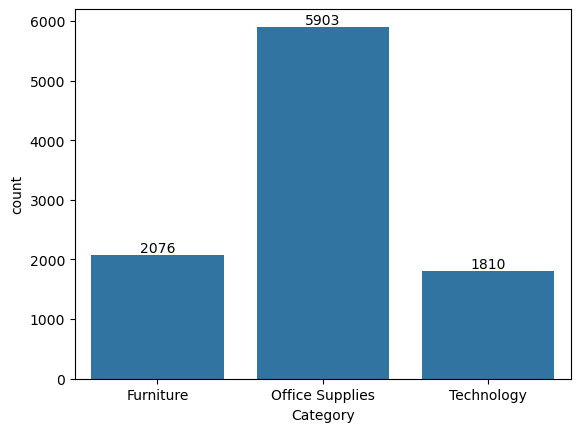

In [36]:
ax=sns.countplot(x='Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Category', ylabel='Sales'>

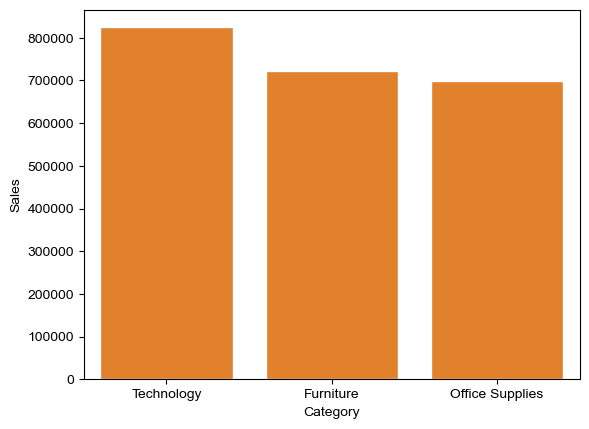

In [40]:
Sales_Category=df.groupby(['Category'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
sns.barplot(x='Category',y='Sales',data=Sales_Category)
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(data=Sales_Category,x='Category',y='Sales')

***Most ordered category is office supplies but most selling category is technology.***

## State

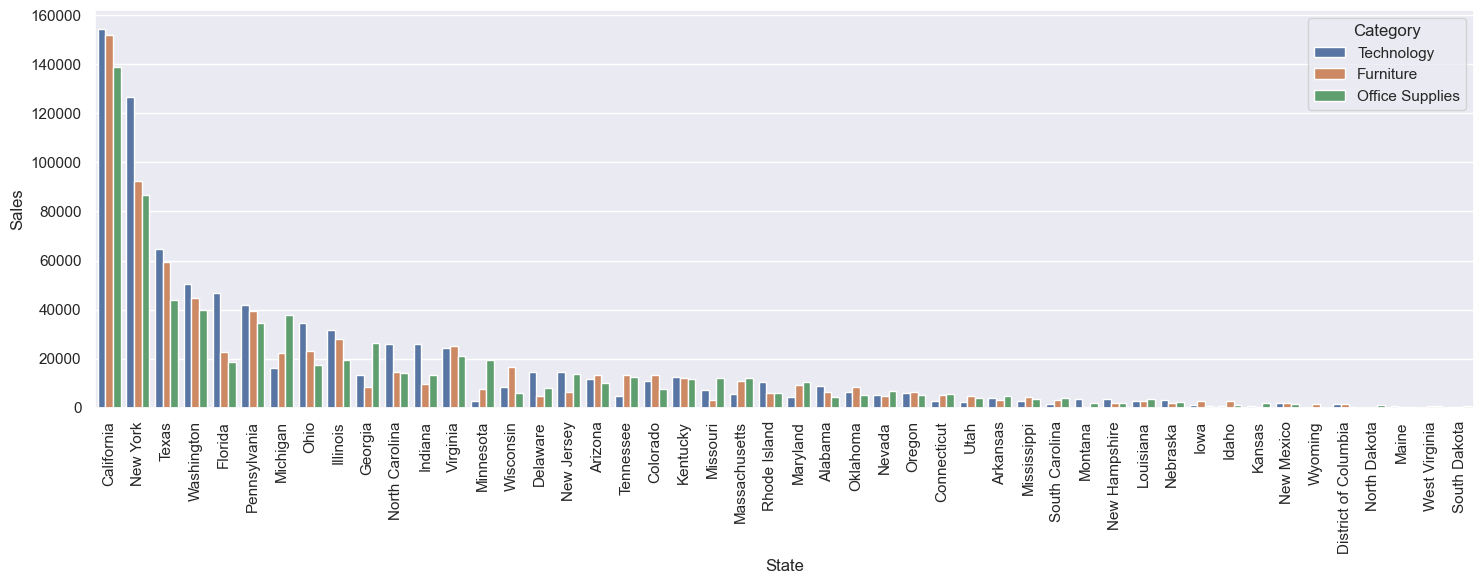

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: group by state and category, summing sales
State_Category = df.groupby(['State', 'Category'], as_index=False)['Sales'].sum()

# Sort (optional)
State_Category = State_Category.sort_values(by='Sales', ascending=False)

# Set proper figure size
plt.figure(figsize=(15, 6))

# Barplot
sns.barplot(x='State', y='Sales', hue='Category', data=State_Category)

# Improve layout
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='State', ylabel='Sales'>

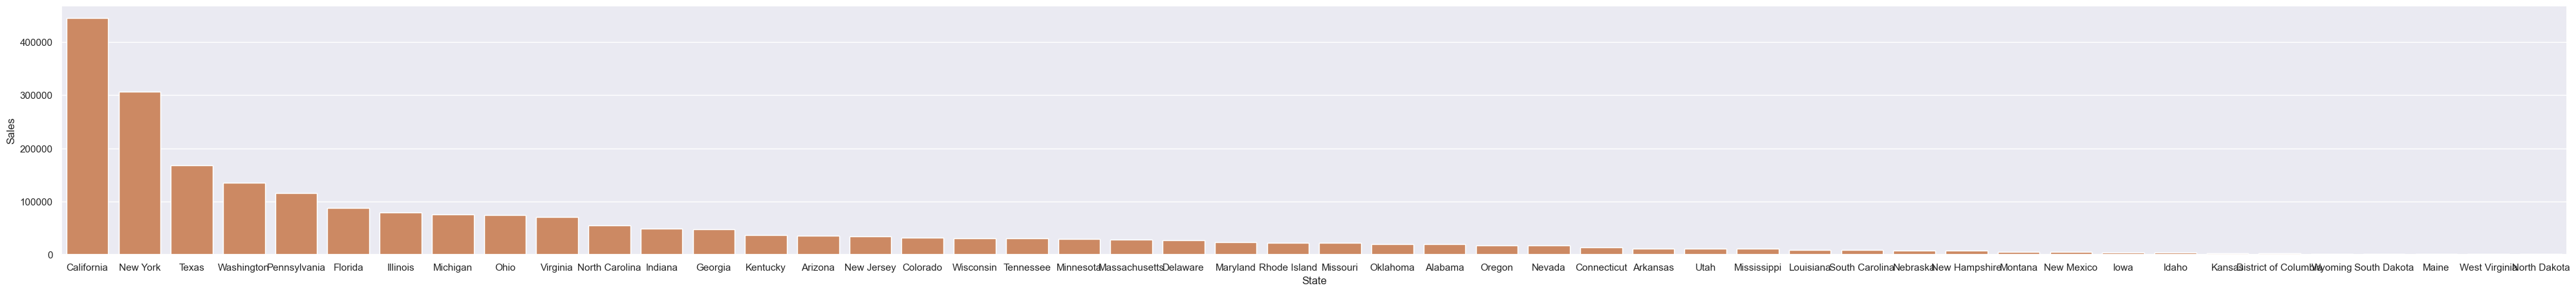

In [50]:
Sales_State=df.groupby(['State'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
sns.barplot(x='State',y='Sales',data=Sales_State)
sns.set(rc={'figure.figsize':(50,10)})
sns.barplot(x='State',y='Sales',data=Sales_State)

***California is the highest selling state of USA but among all categories highest selling category of california is Technology according to this data.***

## Region

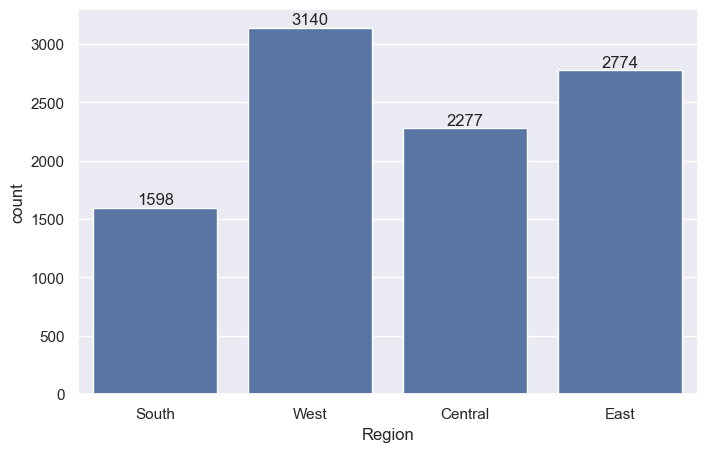

In [140]:
sns.set(rc={'figure.figsize':(8,5)})
ax=sns.countplot(x='Region',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

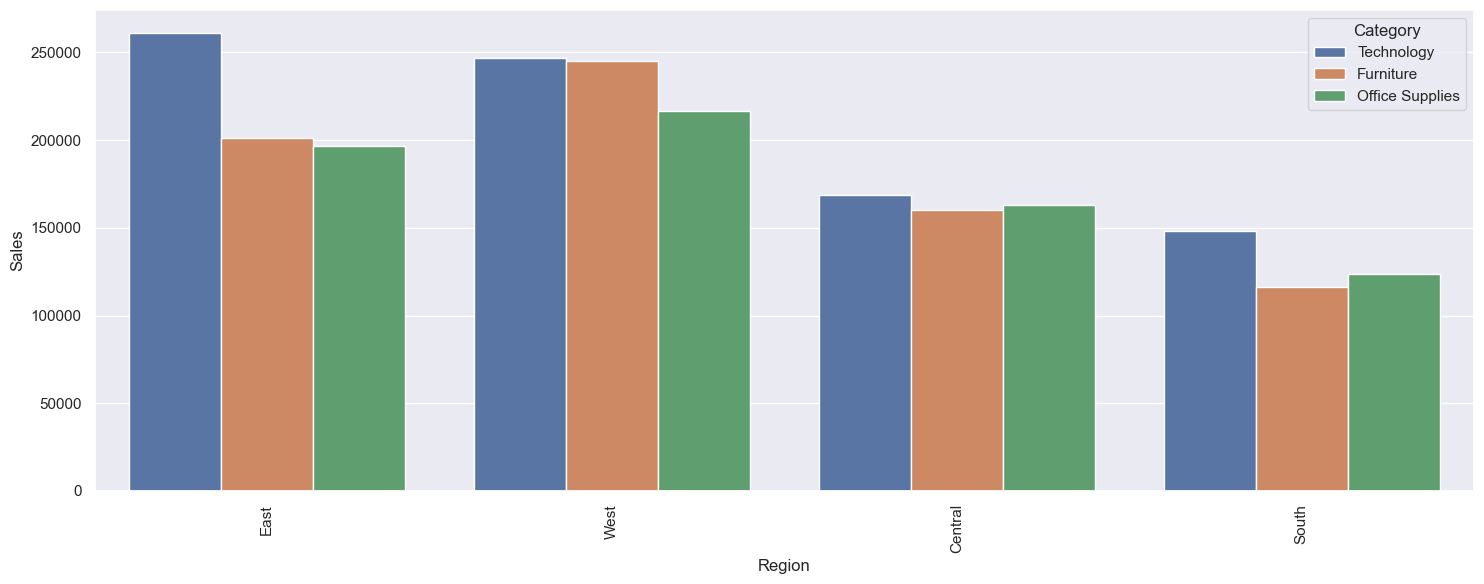

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: group by state and category, summing sales
Region_Category = df.groupby(['Region', 'Category'], as_index=False)['Sales'].sum()

# Sort (optional)
Region_Category = Region_Category.sort_values(by='Sales', ascending=False)

# Set proper figure size
plt.figure(figsize=(15, 6))

# Barplot
sns.barplot(x='Region', y='Sales', hue='Category', data=Region_Category)

# Improve layout
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***West region of United States order most of the selling items(i.e-3140).But most of the revenue generated from Eastern part of the country in case of Technology category.That is why in aggregade (combining technology,furniture & office supplies)West region ranks first in count.***

## Segment

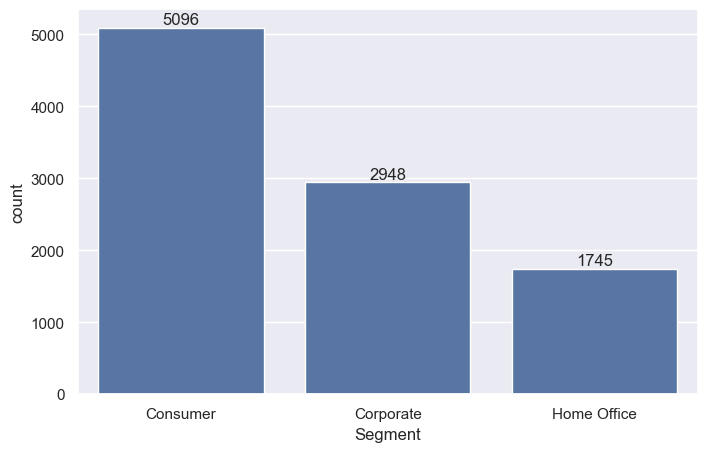

In [60]:
sns.set(rc={'figure.figsize':(8,5)})
ax=sns.countplot(x='Segment',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Segment', ylabel='Sales'>

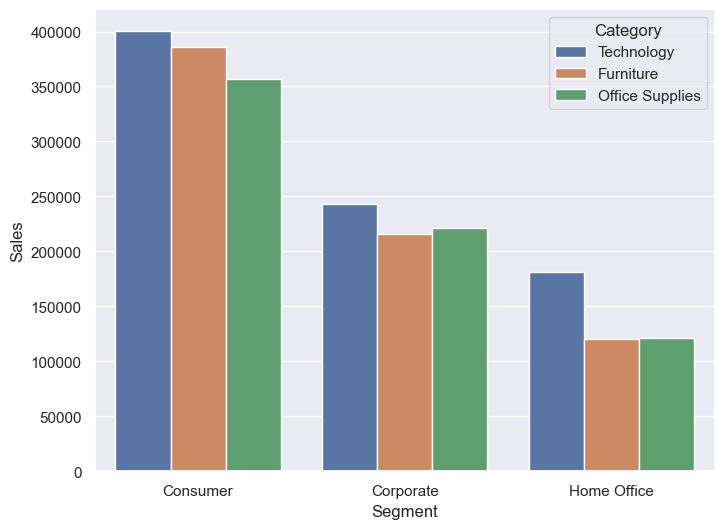

In [78]:
Segment_Category = df.groupby(['Segment', 'Category'], as_index=False)['Sales'].sum()

# Sort (optional)
Segment_Category = Segment_Category.sort_values(by='Sales', ascending=False)

# Set proper figure size
plt.figure(figsize=(8, 6))

# Barplot
sns.barplot(x='Segment', y='Sales',hue='Category', data=Segment_Category)

***Consumer is the most selling segment of the products and they demand most of the Technology categories.So major revenue earned from consumers specifically from their buying of Technology categories related products.***

In [64]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

## Sub_Category

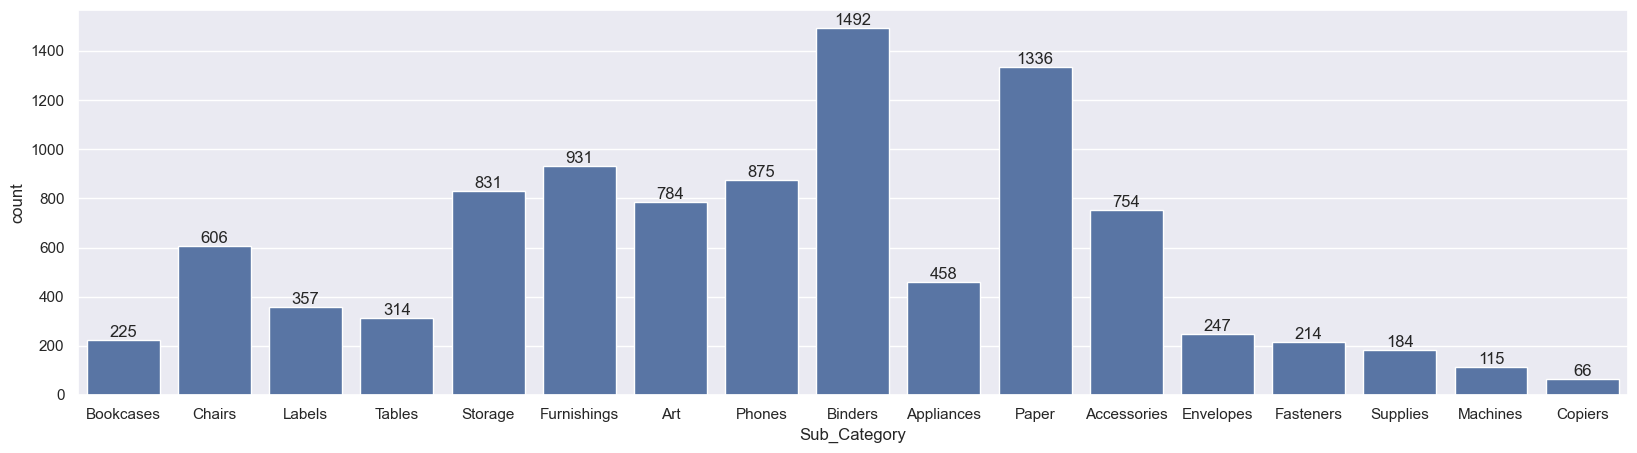

In [66]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='Sub_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Segment', ylabel='Sales'>

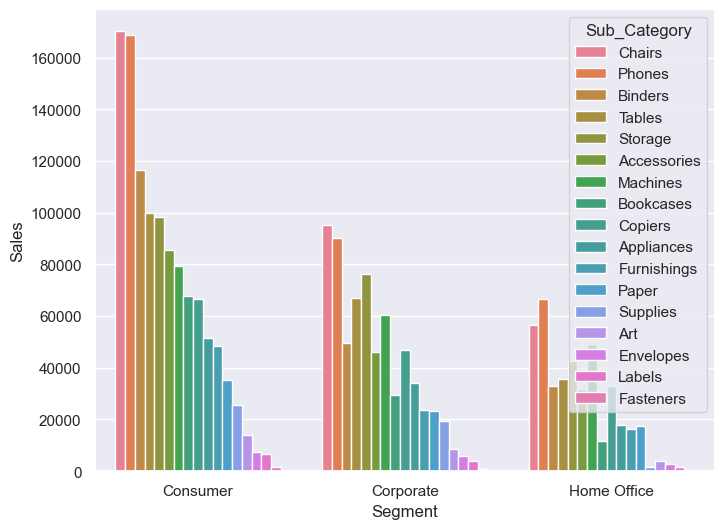

In [68]:
Segment_Sub_Category= df.groupby(['Segment', 'Sub_Category'], as_index=False)['Sales'].sum()

# Sort (optional)
Segment_Sub_Category= Segment_Sub_Category.sort_values(by='Sales', ascending=False)

# Set proper figure size
plt.figure(figsize=(8, 6))

# Barplot
sns.barplot(x='Segment', y='Sales',hue='Sub_Category', data=Segment_Sub_Category)

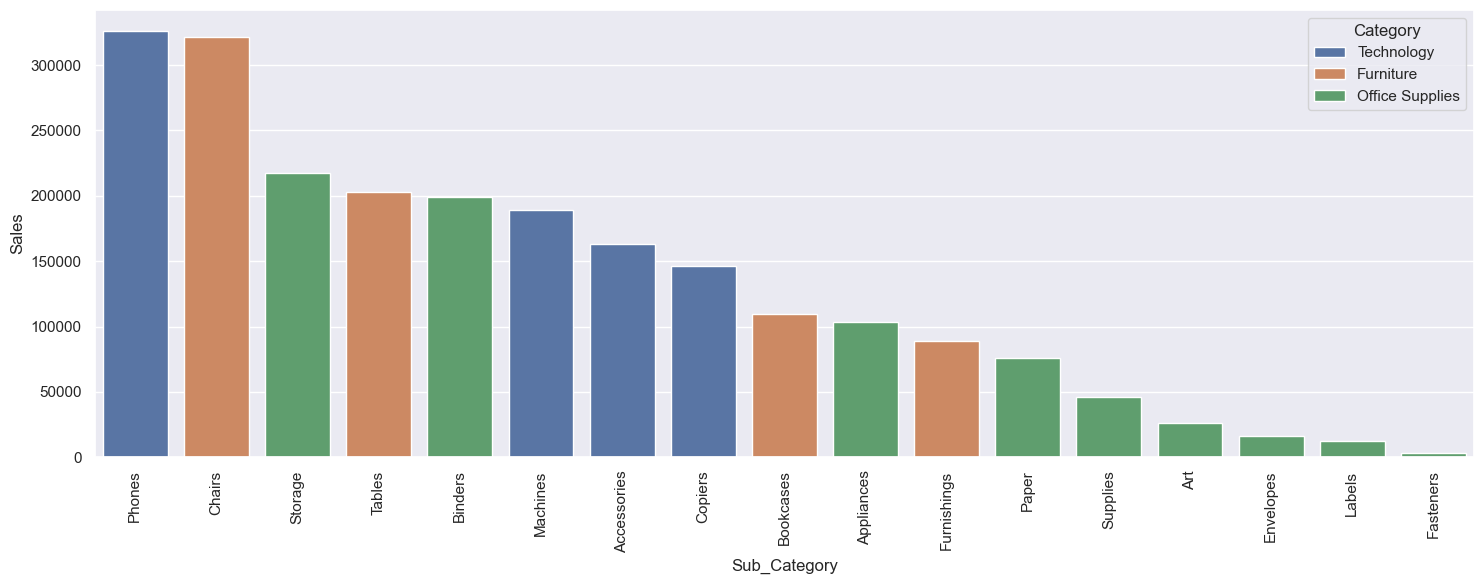

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: group by state and category, summing sales
Sub_Category_Category = df.groupby(['Sub_Category', 'Category'], as_index=False)['Sales'].sum()

# Sort (optional)
Sub_Category_Category = Sub_Category_Category.sort_values(by='Sales', ascending=False)

# Set proper figure size
plt.figure(figsize=(15, 6))

# Barplot
sns.barplot(x='Sub_Category', y='Sales', hue='Category', data=Sub_Category_Category)

# Improve layout
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***Most selling sub category of product is Binders.Most selling subcategory of product is chair demanded by consumer and corporate segment also but most demanding product of home office is phone.In aggregate phone which belongs to Technology category is majorly sold item.***

## Customer_Name

<Axes: xlabel='Customer_Name', ylabel='Sales'>

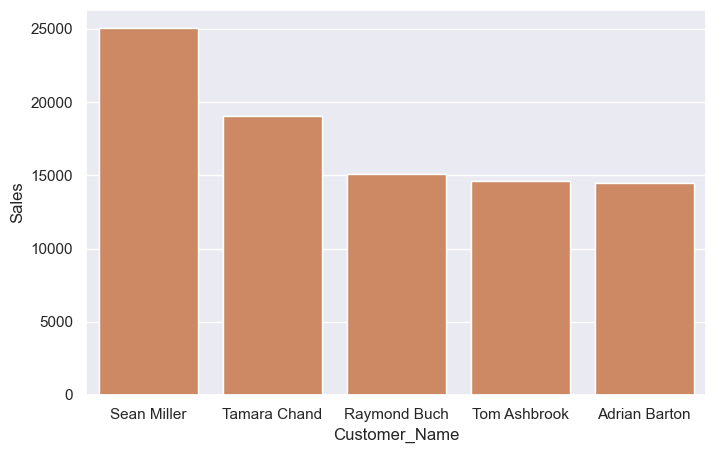

In [86]:
Sales_Customer_Name	=df.groupby(['Customer_Name'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(5)
sns.barplot(x='Customer_Name',y='Sales',data=Sales_Customer_Name)
sns.set(rc={'figure.figsize':(8,10)})
sns.barplot(x='Customer_Name',y='Sales',data=Sales_Customer_Name)

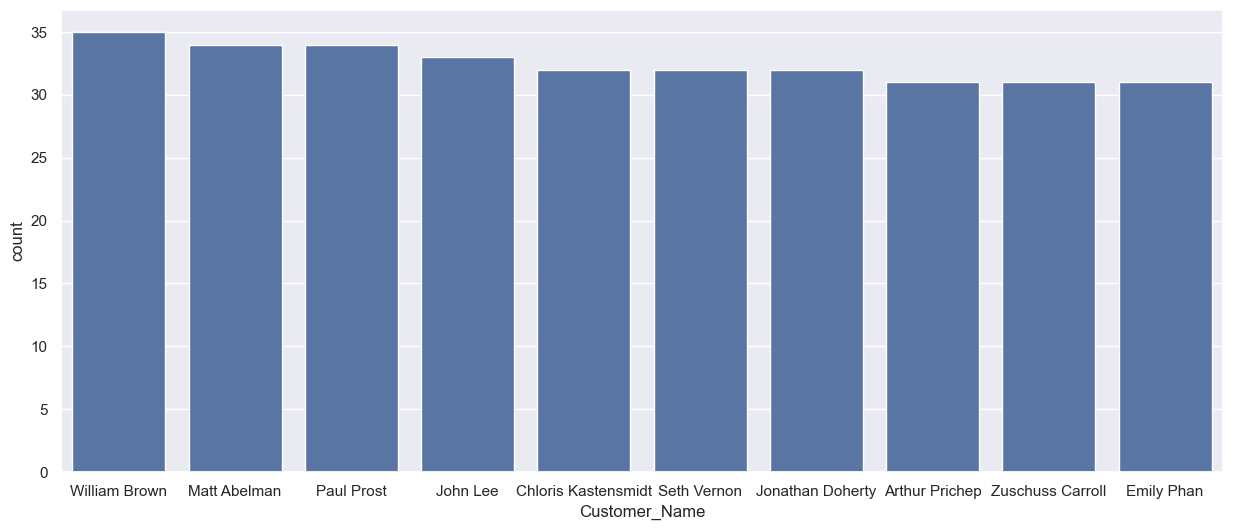

In [112]:
# Step 1: Get top 5 most frequent categories
top10_Customer_Name = df['Customer_Name'].value_counts().nlargest(10).index

# Step 2: Filter original dataframe
filtered_df = df[df['Customer_Name'].isin(top10_Customer_Name)]

# Step 3: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Customer_Name', data=filtered_df, order=top10_Customer_Name)

***first three top order given customers are William Brown, Matt Abelman,Paul Prost but highest amount revenue generated from Sean Miller's order.***

## Product_Name

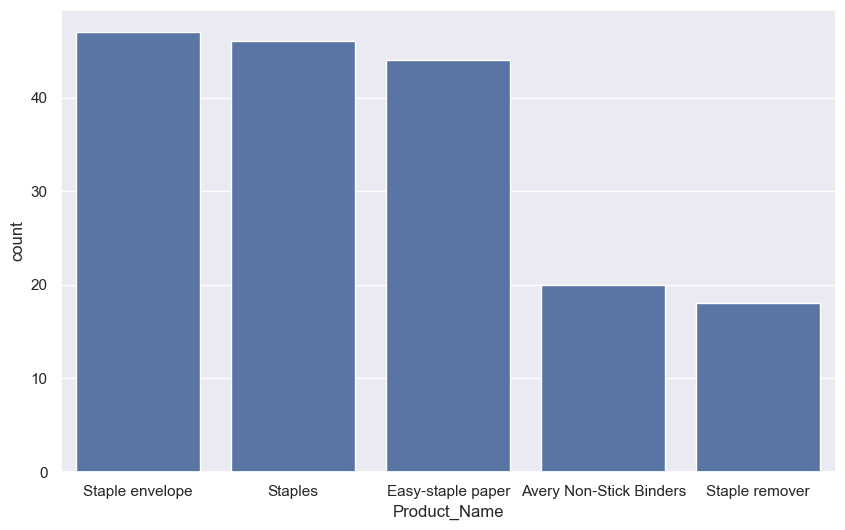

In [106]:
# Step 1: Get top 5 most frequent categories
top5_Product_Name = df['Product_Name'].value_counts().nlargest(5).index

# Step 2: Filter original dataframe
filtered_df = df[df['Product_Name'].isin(top5_Product_Name)]

# Step 3: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Product_Name', data=filtered_df, order=top5_Product_Name)


<Axes: xlabel='Product_Name', ylabel='Sales'>

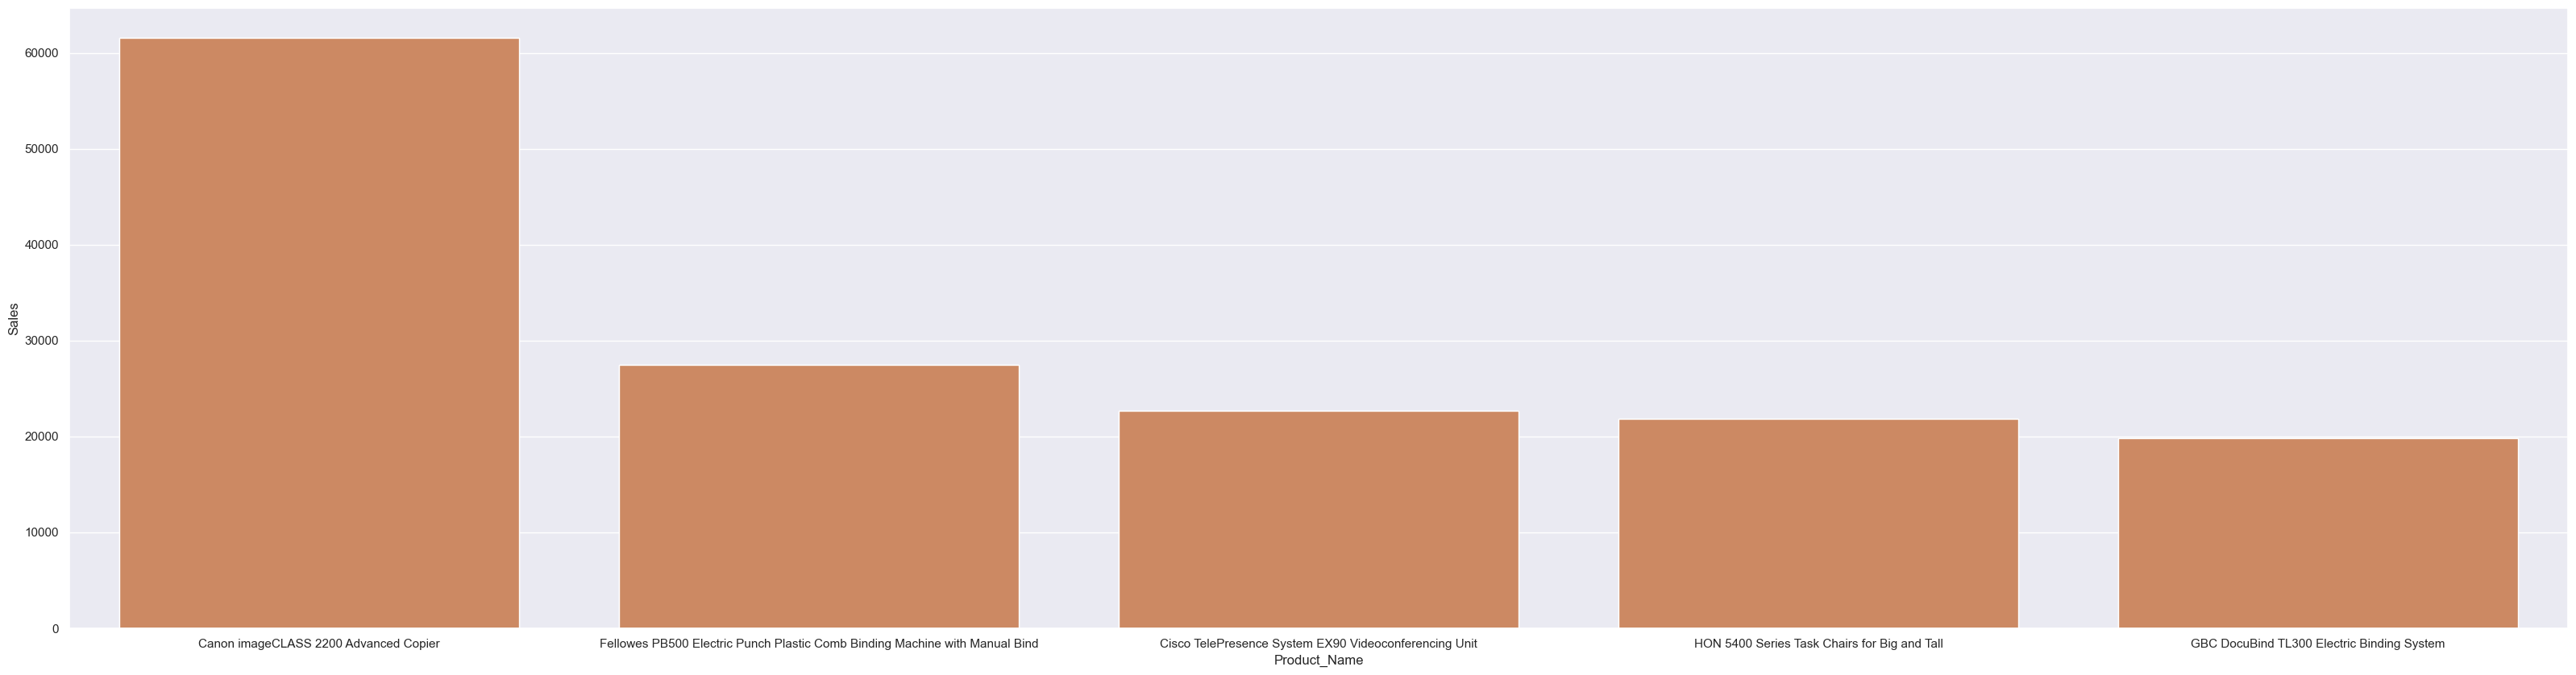

In [98]:
Sales_Product_Name	=df.groupby(['Product_Name'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(5)
sns.barplot(x='Product_Name',y='Sales',data=Sales_Product_Name)
sns.set(rc={'figure.figsize':(50,20)})
sns.barplot(x='Product_Name',y='Sales',data=Sales_Product_Name)

***Top selling product of dsuperstore is staple envelope but top revenue earned by superstore from selling Canon image Glass2200 Advance copier***

## City	

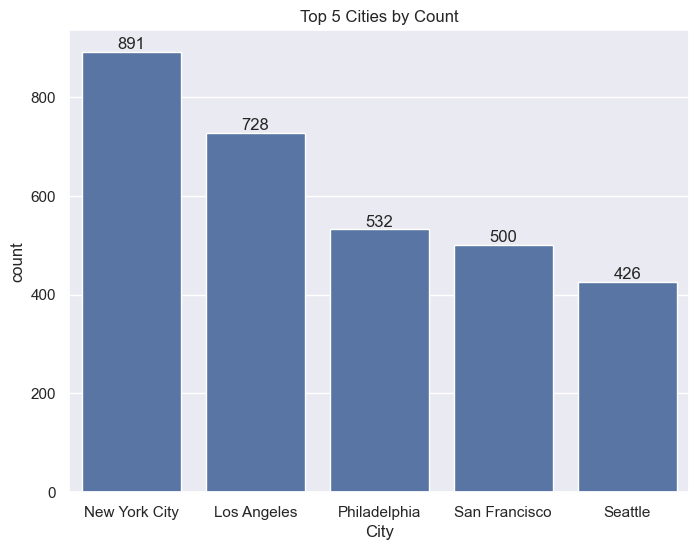

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get top 5 cities by count
top_cities = df['City'].value_counts().nlargest(5).index

# Step 2: Filter the DataFrame for only those top 5 cities
top_df = df[df['City'].isin(top_cities)]

# Step 3: Plot using seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='City', data=top_df, order=top_cities)

# Add labels on bars
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Top 5 Cities by Count')
plt.show()

<Axes: xlabel='City', ylabel='Sales'>

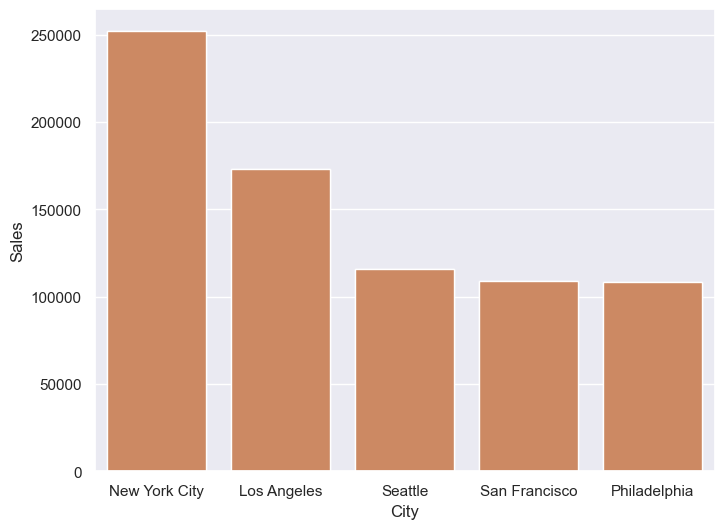

In [162]:
Sales_City=df.groupby(['City'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(5)
sns.barplot(x='City',y='Sales',data=Sales_City)
sns.set(rc={'figure.figsize':(50,20)})
sns.barplot(x='City',y='Sales',data=Sales_City)

***Top order is givem by New York City and also super store gets highest revenue from selling items in New York City.But though philadelphia order third highest but supperstore generates third highest revenue in Seattle City which is higher than philadelphia city's revenue.***

## Conclusion

**William Brown is the highest demanding customer who lives in New York City which is Eastern region of United States and demands Canon image Glass2200 Advance copier which is under Technogy Category.**